In [30]:
##import necessary libraries
#data analysis libraries
import numpy as np
import pandas as pd

pd.set_option('display.width', None)#pixels
pd.set_option('display.max_column', None)
pd.set_option('precision', 2)

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sbn

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#read in and explore the historic data

#import train and test CSV files
train=pd.read_csv('train.csv') #12columns  #dataset contains both data and metadata
test=pd.read_csv('test.csv') #11 columns

#take a look at the training data
print(train.describe())
print("\n")
print(train.describe(include="all"))

       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33


        PassengerId  Survived  Pclass                     Name   Sex     Age  \
count        891.00    891.00  891.00                      891   891  714.00   
unique          NaN       NaN     NaN                      891     2     NaN   
top             NaN       NaN     NaN  Braund, Mr. Owen Harris  male     NaN   
freq            NaN       NaN     NaN                    

In [11]:
#del train['Name',Ticket','Cabin']
#print(train)
#train['Sex'] = train['Sex'].map({'male':1,'female':0})
#print(train)

In [66]:
print(train.describe(include="all"))
#value missing in age, Cabin, Embarked

        PassengerId  Survived  Pclass                     Name   Sex     Age  \
count        891.00    891.00  891.00                      891   891  714.00   
unique          NaN       NaN     NaN                      891     2     NaN   
top             NaN       NaN     NaN  Braund, Mr. Owen Harris  male     NaN   
freq            NaN       NaN     NaN                        1   577     NaN   
mean         446.00      0.38    2.31                      NaN   NaN   29.70   
std          257.35      0.49    0.84                      NaN   NaN   14.53   
min            1.00      0.00    1.00                      NaN   NaN    0.42   
25%          223.50      0.00    2.00                      NaN   NaN   20.12   
50%          446.00      0.00    3.00                      NaN   NaN   28.00   
75%          668.50      1.00    3.00                      NaN   NaN   38.00   
max          891.00      1.00    3.00                      NaN   NaN   80.00   

         SibSp   Parch  Ticket    Fare 

In [13]:
print( "\n\nTrain data:\n", train.columns)
print("\n\nTest data:\n", test.columns)
print()
print(train.head()) #first 5 rows of data
print(train.sample(20))

print("Data types for each feature:")
print(train.dtypes)



Train data:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Test data:
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0 

In [14]:
((891-714)/891)*100

19.865319865319865

In [28]:
((891-204)/891)*100

77.10437710437711

In [15]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


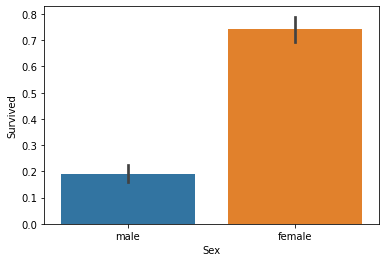

In [16]:
#[3:31 PM] Jeetendra Singh
#4) Data Visualization
#*************************************
#It's time to visualize our data so we can
#  estimate few predictions
#-----------------
#4.A) Sex Feature
#-----------------
#draw a bar plot of survival by sex
sbn.barplot(x="Sex", y="Survived", data=train)
plt.show()


In [9]:
#[3:49 PM] Jeetendra Singh
print( "------------------\n\n"  )
print( train  )

print( "------------------\n\n"  )
print( train["Survived"]  )
print( "------------------\n\n"  )
print( train["Sex"] == 'female'  )


print( "**********\n\n"  )
print( train["Survived"][  train["Sex"] == 'female' ]  )

print( "*****************\n\n"  )
print(train["Survived"][train["Sex"] == 'female'].value_counts() )


------------------


     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.25   NaN        S
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.28   C85        C
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.92   NaN        S
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.10  C123        S
4              5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.05   NaN        S
..           ...       ...     ...                     

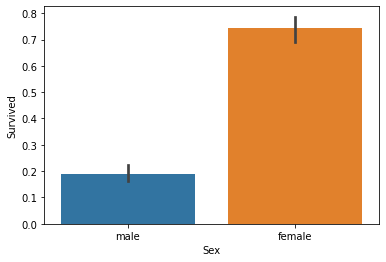

------------------


     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.25   NaN        S
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.28   C85        C
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.92   NaN        S
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.10  C123        S
4              5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.05   NaN        S
..           ...       ...     ...                     

In [10]:
#[3:58 PM] Jeetendra Singh
    #-----------------
#4.A) Sex Feature
#-----------------
#draw a bar plot of survival by sex
sbn.barplot(x="Sex", y="Survived", data=train)
plt.show()


#print(" percentages of females vs. males that survive")
#print( "Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100  )

print( "------------------\n\n"  )
print( train  )

print( "------------------\n\n"  )
print( train["Survived"]  )
print( "------------------\n\n"  )
print( train["Sex"] == 'female'  )


print( "**********\n\n"  )
print( train["Survived"][  train["Sex"] == 'female' ]  )

print( "*****************\n\n"  )
print(train["Survived"][train["Sex"] == 'female'].value_counts() )

print( "====================================\n\n"  )
print( train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)  )

print( train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]  )


print( "\n\n\nPercentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100  )
print( "\nPercentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100  )


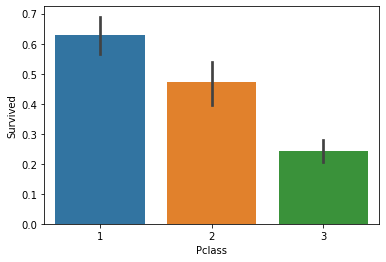

In [14]:
#[4:06 PM] Jeetendra Singh
    #--------------------
#4.B) Pclass Feature
#--------------------
#draw a bar plot of survival by Pclass
sbn.barplot(x="Pclass", y="Survived", data=train)
plt.show()


In [15]:
#[4:18 PM] Jeetendra Singh
    #print( percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)


Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847



Percentage of Pclass = 1 who survived:

 1    136
0     80
Name: Survived, dtype: int64

Percentage of Pclass = 1 who survived:

 1    0.63
0    0.37
Name: Survived, dtype: float64

Percentage of Pclass = 1 who survived:

 0.6296296296296297


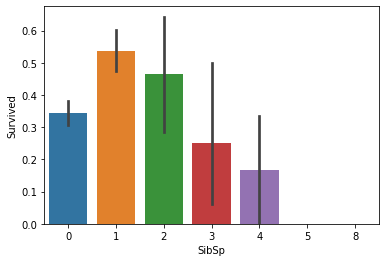

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


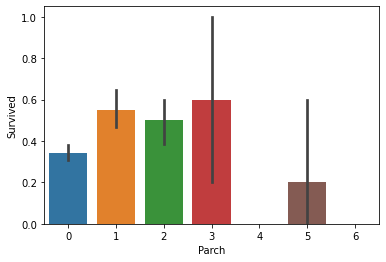

In [16]:
#
print()
print( "Percentage of Pclass = 1 who survived:\n\n", train["Survived"][train["Pclass"] == 1].value_counts() )
print()
print( "Percentage of Pclass = 1 who survived:\n\n", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True) )
print()
print( "Percentage of Pclass = 1 who survived:\n\n", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1] )
#----------------------
#4.C) SibSp Feature
#----------------------
#draw a bar plot for SibSp vs.survival
sbn.barplot(x="SibSp", y="Survived", data=train)
plt.show()
#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:",train["Survived"] [train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:",train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:",train["Survived"][train["SibSp"] ==2].value_counts(normalize = True)[1]*100)
plt.show()

#--------------------#4.D)Parch Feature#--------------------#draw a bar plot for Parch vs. survival
sbn.barplot(x="Parch", y="Survived", data=train)
plt.show()

     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked     AgeGroup
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.25   NaN        S      Student
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.28   C85        C        Adult
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.92   NaN        S  Young Adult
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.10  C123        S  Young Adult
4              5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.05   NaN        S  Young Adul

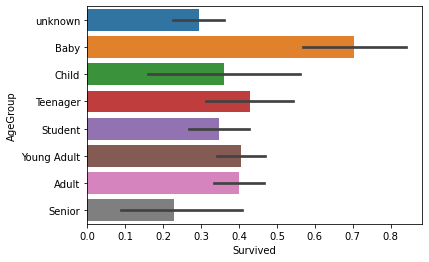

In [17]:
#-----------------
#4.E)Age Feature
#-----------------
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels=['unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels)
print(train)
#draw a bar plot of Age vs. survival
sbn.barplot(x="Survived", y="AgeGroup", data=train)
plt.show()

In [27]:
print(train.head(25))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   

                                     

###############


     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked     AgeGroup  CabinBool
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.25   NaN        S      Student          0
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.28   C85        C        Adult          1
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.92   NaN        S  Young Adult          0
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.10  C123        S  Young Adult          1
4              5         0       3                           Allen, Mr. William Henry    mal

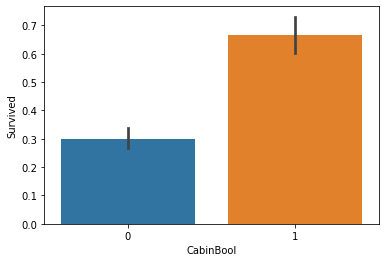

In [18]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))
print("###############\n\n")
print(train)
#draw a bar plot of Cabin vs. survival
sbn.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

print()

###################################


     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked     AgeGroup  CabinBool
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.25   NaN        S      Student          0
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.28   C85        C        Adult          1
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.92   NaN        S  Young Adult          0
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.10  C123        S  Young Adult          1
4              5         0       3                           Allen, Mr. 

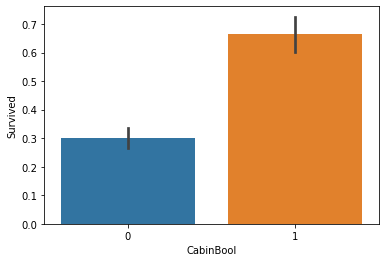

In [19]:
#--------------------
#4.F) Cabin Feature
#--------------------
#I think the idea here is that people with recorded cabin numbers are of higher socioeconomic class,
# and thus more likely to survive.
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))
print( "###################################\n\n" )
print( train )
#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:",train["Survived"] [train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of CabinBool = 0 who survived:",train["Survived"] [train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sbn.barplot(x="CabinBool", y="Survived", data=train);

In [45]:
#5) Cleaning Data
#*********************************
#Time to clean our data to account for missing values and unnecessary information!
#Looking at the Test Data
#Let's see how our test data looks!
print( test.describe(include="all") )

        PassengerId  Pclass     Sex   SibSp   Parch  Embarked     AgeGroup  \
count        418.00  418.00  418.00  418.00  418.00    418.00          418   
unique          NaN     NaN     NaN     NaN     NaN       NaN            8   
top             NaN     NaN     NaN     NaN     NaN       NaN  Young Adult   
freq            NaN     NaN     NaN     NaN     NaN       NaN           96   
mean        1100.50    2.27    0.36    0.45    0.39      1.46          NaN   
std          120.81    0.84    0.48    0.90    0.98      0.69          NaN   
min          892.00    1.00    0.00    0.00    0.00      1.00          NaN   
25%          996.25    1.00    0.00    0.00    0.00      1.00          NaN   
50%         1100.50    3.00    0.00    0.00    0.00      1.00          NaN   
75%         1204.75    3.00    1.00    1.00    0.00      2.00          NaN   
max         1309.00    3.00    1.00    8.00    9.00      3.00          NaN   

        CabinBool  Title  FareBand  
count      418.00  418.0  

In [52]:
#train = train.drop(['Ticket'], axis =1)
#test = test.drop(['Ticket'], axis =1)
print( test.describe(include="all") )

        PassengerId  Pclass     Sex   SibSp   Parch  Embarked     AgeGroup  \
count        418.00  418.00  418.00  418.00  418.00    418.00          418   
unique          NaN     NaN     NaN     NaN     NaN       NaN            8   
top             NaN     NaN     NaN     NaN     NaN       NaN  Young Adult   
freq            NaN     NaN     NaN     NaN     NaN       NaN           96   
mean        1100.50    2.27    0.36    0.45    0.39      1.46          NaN   
std          120.81    0.84    0.48    0.90    0.98      0.69          NaN   
min          892.00    1.00    0.00    0.00    0.00      1.00          NaN   
25%          996.25    1.00    0.00    0.00    0.00      1.00          NaN   
50%         1100.50    3.00    0.00    0.00    0.00      1.00          NaN   
75%         1204.75    3.00    1.00    1.00    0.00      2.00          NaN   
max         1309.00    3.00    1.00    8.00    9.00      3.00          NaN   

        CabinBool  Title  FareBand  
count      418.00  418.0  

In [32]:
#train = train.drop(['Ticket'], axis =1)
#test = test.drop(['Ticket'], axis =1)

In [33]:
print( test.describe(include="all") )

        PassengerId  Pclass              Name   Sex     Age   SibSp   Parch  \
count        418.00  418.00               418   418  418.00  418.00  418.00   
unique          NaN     NaN               418     2     NaN     NaN     NaN   
top             NaN     NaN  Kelly, Mr. James  male     NaN     NaN     NaN   
freq            NaN     NaN                 1   266     NaN     NaN     NaN   
mean        1100.50    2.27               NaN   NaN   23.94    0.45    0.39   
std          120.81    0.84               NaN   NaN   17.74    0.90    0.98   
min          892.00    1.00               NaN   NaN   -0.50    0.00    0.00   
25%          996.25    1.00               NaN   NaN    9.00    0.00    0.00   
50%         1100.50    3.00               NaN   NaN   24.00    0.00    0.00   
75%         1204.75    3.00               NaN   NaN   35.75    1.00    0.00   
max         1309.00    3.00               NaN   NaN   76.00    8.00    9.00   

          Fare            Cabin Embarked     AgeGro

In [20]:
#Some Observations from above output for test.csv data
#----------------------------------------------------
#1) We have a total of 418 passengers.
#2) 1 value from the Fare feature is missing in test.csv file.
#3) Around 20.5% of the Age feature is missing in training file
# we will need to fill that in.
#Cabin Feature
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
#Ticket Feature#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [21]:
#Embarked Feature#now we need to fill in the missing values in the Embarked feature
print( "Number of people embarking in Southampton(S):" , )
print( "\n\nSHAPE = " , train[train["Embarked"] == "S"].shape )
print( "SHAPE[0] = " , train[train["Embarked"] == "S"].shape[0] )
southampton = train[train["Embarked"] == "S"].shape[0]
print( southampton )
print( "Number of people embarking in Cherbourg (C):" , )
cherbourg = train[train["Embarked"] == "C"].shape[0]
print( cherbourg )
print( "Number of people embarking in Queenstown (Q):" , )
queenstown = train[train["Embarked"] == "Q"].shape[0]
print( queenstown )
#OUTPUT:-
#----------
#Number of people embarking in Southampton (S): 644
#Number of people embarking in Cherbourg (C): 168
#Number of people embarking in Queenstown (Q): 77
#It's clear that the majority of people embarked in Southampton (S).
# Let's go ahead and fill in the missing values with S.
#replacing the missing values in the Embarked feature with  S
train = train.fillna({"Embarked": "S"})

Number of people embarking in Southampton(S):


SHAPE =  (644, 12)
SHAPE[0] =  644
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [22]:
combine=[train,test]
print(combine[0])

#columns=[train('Name')]
for dataset in combine:
    dataset['Title']=dataset['Name'].str.extract(',([A-Za-z]+)\.', expand=False)
print(train)
print()

     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch   Fare Embarked     AgeGroup  CabinBool
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0   7.25        S      Student          0
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0  71.28        C        Adult          1
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0   7.92        S  Young Adult          0
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0  53.10        S  Young Adult          1
4              5         0       3                           Allen, Mr. William Henry    male  35.0      0      0   8.05        S  Young Adult          0
..           ...       ...     ...                                          

In [23]:
print( pd.crosstab(train['Title'], train['Sex'] ) )

# replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(
        ['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer','Dona'],'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
print( "\n\nAfter grouping rare title :\n" , train )
print( train[['Title', 'Survived']].groupby(['Title'], as_index=False).count() )

Empty DataFrame
Columns: []
Index: []


After grouping rare title :
      PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch   Fare Embarked     AgeGroup  CabinBool  Title
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0   7.25        S      Student          0    NaN
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0  71.28        C        Adult          1    NaN
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0   7.92        S  Young Adult          0    NaN
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0  53.10        S  Young Adult          1    NaN
4              5         0       3                           Allen, Mr. William Henry    male  35.0      0      0   8.05      

In [24]:
print( "\nMap each of the title groups to a numerical value." )
title_mapping = {"Mr": 1,"Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

print( "\n\nAfterreplacing title with neumeric values.\n" )
print( train )


Map each of the title groups to a numerical value.


Afterreplacing title with neumeric values.

     PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch   Fare Embarked     AgeGroup  CabinBool  Title
0              1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0   7.25        S      Student          0    0.0
1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0  71.28        C        Adult          1    0.0
2              3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0   7.92        S  Young Adult          0    0.0
3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0  53.10        S  Young Adult          1    0.0
4              5         0       3                           Allen, Mr. William Henry    male  35

In [44]:
#Next, we'll try to predict the missing Age values from the most common age for their Title.
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() 
print( "mode() of mr_age : ", mr_age ) # Mr.= Young Adult
print( "\n\n" )
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() 
#Miss.= Student
print( "mode() of miss_age : ", miss_age )
print( "\n\n" )
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode()
#Mrs.= Adult
print( "mode() of mrs_age : ", mrs_age )
print( "\n\n" )
master_age = train[train["Title"] == 4]["AgeGroup"].mode() # Baby
print( "mode() of master_age : ", master_age )
print( "\n\n" )
royal_age = train[train["Title"] == 5]["AgeGroup"].mode()
# Adult
print( "mode() of royal_age : ", royal_age )
print( "\n\n" )
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() # Adult
print( "mode() of rare_age : ", rare_age )
print( "\n\n**************************************************\n\n" )
print( train.describe(include="all") )
print( train )
print( "\n\n******** train[AgeGroup][0] : \n\n" )

for x in range(10) : #0,1,2......9 
    print( train["AgeGroup"][x] )

age_title_mapping = {1: "Young Adult", 2: "Student",3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])): # 0, 1, 2, 3......890 
    if train["AgeGroup"][x] == "Unknown": # x=5( means for 6th record ) 
        train["AgeGroup"][x] = age_title_mapping[ train["Title"][x] ]

for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

#map each Age value to a numerical value
age_mapping = {"Baby":1, 'Child':2, 'Teenager':3, "Student":4, "Young Adult": 5, "Adult" :6 , "Senior": 7}
train["AgeGroup"] = train["AgeGroup"].map(age_mapping)
test["AgeGroup"] = test["AgeGroup"].map(age_mapping)
print()
print( train )    

# dropping the Age feature for now, might change

train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

print( "\n\nAge column droped." )
print( train )
#Name Feature
#We can drop the name feature now that we've extracted the titles.
#drop the name feature since it contains no more useful information.

train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

#Sex Feature
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
print( train )
#Embarked Feature
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
print()
print( train.head() )
#Fare Feature
#It is time separate the fare values into some logical groups as well as
# filling in the single missing value in the test dataset.
#fill in missing Fare value in test set based on mean fare for that Pclass

for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3 
        test["Fare"][x] = round(train[ train["Pclass"] == pclass ]["Fare"].mean(), 2)

#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4,labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4,labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

#check train data
print( "\n\nFare column droped\n" )
print( train )

#check test data
print()
print( test.head() )

#****************************************
#6) Choosing the Best Model#****************************************
#Splitting the Training Data
#We will use part of our training data (20% in this case) to test the accuracy of our different models.

from sklearn.model_selection import train_test_split
input_predictors = train.drop(['Survived', 'PassengerId'], axis=1)
ouptut_target = train["Survived"]

x_train, x_val, y_train, y_val = train_test_split(input_predictors, ouptut_target,test_size = 0.20, random_state = 10)

#Testing Different Models
#I will be testing the following models with my training data (got the list from here):
#1) Logistic Regression
#2) Gaussian Naive Bayes
#3) Support Vector Machines
#4) Decision Tree Classifier
#5) Random Forest Classifier
#6) KNN or k-Nearest Neighbors
#For each model, we set the model, fit it with 80% of our training data,
# predict for 20% of the training data and check the accuracy.

from sklearn.metrics import accuracy_score

##
x_train = x_train.fillna(x_train.mean())
x_val = x_val.fillna(x_val.mean())
## for ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#MODEL-1) LogisticRegression
#------------------------------------------
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-1 Accuracy of LogisticRegression : ",acc_logreg)
#OUTPUT:-
#MODEL-1: Accuracy of LogisticRegression : 77.09
#MODEL-2) Gaussian Naive Bayes
#------------------------------------------
#from sklearn.naive_bayes import GaussianNBgaussian = GaussianNB()gaussian.fit(x_train, y_train)y_pred = gaussian.predict(x_val)acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)print( "MODEL-2: Accuracy of GaussianNB : ", acc_gaussian )#OUTPUT:-#MODEL-2: Accuracy of GaussianNB : 78.68#MODEL-3) Support Vector Machines#------------------------------------------from sklearn.svm import SVCsvc = SVC()svc.fit(x_train, y_train)y_pred = svc.predict(x_val)acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)print( "MODEL-3: Accuracy of Support Vector Machines : ", acc_svc )#OUTPUT:-#MODEL-3: Accuracy of Support Vector Machines : 82.74#MODEL-4) Decision Tree Classifier#------------------------------------------from sklearn.tree import DecisionTreeClassifierdecisiontree = DecisionTreeClassifier()decisiontree.fit(x_train, y_train)y_pred = decisiontree.predict(x_val)acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)print( "MODEL-4: Accuracy of DecisionTreeClassifier : ", acc_decisiontree )#OUTPUT:-#MODEL-4: Accuracy of DecisionTreeClassifier : 81.22#MODEL-5) Random Forest#------------------------------------------from sklearn.ensemble import RandomForestClassifierrandomforest = RandomForestClassifier()randomforest.fit(x_train, y_train)y_pred = randomforest.predict(x_val)acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)print( "MODEL-5: Accuracy of RandomForestClassifier : ",acc_randomforest )#OUTPUT:-#MODEL-5: Accuracy of RandomForestClassifier : 83.25#MODEL-6) KNN or k-Nearest Neighbors#------------------------------------------from sklearn.neighbors import KNeighborsClassifierknn = KNeighborsClassifier()knn.fit(x_train, y_train)y_pred = knn.predict(x_val)acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)print( "MODEL-6: Accuracy of k-Nearest Neighbors : ",acc_knn )#OUTPUT:-#MODEL-6: Accuracy of k-Nearest Neighbors : 77.66#Let's compare the accuracies of each model!models = pd.DataFrame({'Model': ['Logistic Regression','Gaussian Naive Bayes','Support Vector Machines','Decision Tree','Random Forest', 'KNN',],'Score': [acc_logreg, acc_gaussian, acc_svc,acc_decisiontree,acc_randomforest, acc_knn]})print()print( models.sort_values(by='Score', ascending=False) )

#I decided to use the Random Forest model for the testing data.#7) Creating Submission Result File#***********************************#It is time to create a submission.csv file which includes our predictions for test data#set ids as PassengerId and predict survivalids = test['PassengerId']predictions = randomforest.predict(test.drop('PassengerId', axis=1))#set the output as a dataframe and convert to csv file named submission.csvoutput = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })output.to_csv('submission.csv', index=False)print( "All survival predictions done." )print( "All predictions exported to submission.csv file." )print( output )

KeyError: 'Title'

In [26]:
print( "MODEL-1 Accuracy of LogisticRegression : ",acc_logreg)

MODEL-1 Accuracy of LogisticRegression :  76.54


In [43]:
#MODEL-2) Gaussian Naive Bayes
#------------------------------------------
#
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()

gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-2: Accuracy of GaussianNB : ", acc_gaussian )
#OUTPUT:-
#MODEL-2: Accuracy of GaussianNB : 78.68
#MODEL-3) Support Vector Machines#------------------------------------------
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-3: Accuracy of Support Vector Machines : ", acc_svc )
#OUTPUT:-
#MODEL-3: Accuracy of Support Vector Machines : 82.74
#MODEL-4) Decision Tree Classifier
#------------------------------------------
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-4: Accuracy of DecisionTreeClassifier : ", acc_decisiontree )
#OUTPUT:-#MODEL-4: Accuracy of DecisionTreeClassifier : 81.22
#MODEL-5) Random Forest#------------------------------------------
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-5: Accuracy of RandomForestClassifier : ",acc_randomforest )
#OUTPUT:-#MODEL-5: Accuracy of RandomForestClassifier : 83.25
#MODEL-6) KNN or k-Nearest Neighbors#------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print( "MODEL-6: Accuracy of k-Nearest Neighbors : ",acc_knn 
     )#OUTPUT:-#MODEL-6: Accuracy of k-Nearest Neighbors : 77.66
#Let's compare the accuracies of each model!
models = pd.DataFrame({'Model': ['Logistic Regression','Gaussian Naive Bayes','Support Vector Machines','Decision Tree','Random Forest', 'KNN',],'Score': [acc_logreg, acc_gaussian, acc_svc,acc_decisiontree,acc_randomforest, acc_knn]})
print()
print( models.sort_values(by='Score', ascending=False) )

#I decided to use the Random Forest model for the testing data.
#7) Creating Submission Result File
#***********************************
#It is time to create a submission.csv file which includes our predictions for test data
#set ids as PassengerId and predict survival
ids = test['PassengerId']

test = test.fillna(test.mean())# for same error

predictions = randomforest.predict(test.drop('PassengerId', axis=1))
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)
print( "All survival predictions done." )
print( "All predictions exported to submission.csv file." )
print( output )

MODEL-2: Accuracy of GaussianNB :  76.54
MODEL-3: Accuracy of Support Vector Machines :  75.42
MODEL-4: Accuracy of DecisionTreeClassifier :  73.74
MODEL-5: Accuracy of RandomForestClassifier :  78.77
MODEL-6: Accuracy of k-Nearest Neighbors :  79.33

                     Model  Score
5                      KNN  79.33
4            Random Forest  78.77
0      Logistic Regression  76.54
1     Gaussian Naive Bayes  76.54
2  Support Vector Machines  75.42
3            Decision Tree  73.74


ValueError: could not convert string to float: 'Kelly, Mr. James'

In [35]:
print( train.describe(include="all") )

        PassengerId  Survived  Pclass                     Name   Sex     Age  \
count        891.00    891.00  891.00                      891   891  714.00   
unique          NaN       NaN     NaN                      891     2     NaN   
top             NaN       NaN     NaN  Braund, Mr. Owen Harris  male     NaN   
freq            NaN       NaN     NaN                        1   577     NaN   
mean         446.00      0.38    2.31                      NaN   NaN   29.70   
std          257.35      0.49    0.84                      NaN   NaN   14.53   
min            1.00      0.00    1.00                      NaN   NaN    0.42   
25%          223.50      0.00    2.00                      NaN   NaN   20.12   
50%          446.00      0.00    3.00                      NaN   NaN   28.00   
75%          668.50      1.00    3.00                      NaN   NaN   38.00   
max          891.00      1.00    3.00                      NaN   NaN   80.00   

         SibSp   Parch  Ticket    Fare 